## Chapter outline

### Wrapper Methods
* Lasso
* Feature importance from decision trees
* Recursive feature elemination by feature importance

### 7.1 Lasso Method

* Data need to be scaled for applying this method

##### 7.1.1 Using Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
brest_cancer = load_breast_cancer()
X = pd.DataFrame(brest_cancer.data, columns = brest_cancer.feature_names)
y = brest_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(
    LogisticRegression(
        C = 0.5, penalty="l1", solver = "liblinear", random_state=10
    )
)

sel_.fit(scaler.transform(X_train), y_train)
sel_.get_support()

array([False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [15]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean fractal dimension',
       'texture error', 'perimeter error', 'area error', 'smoothness error',
       'concavity error', 'concave points error', 'symmetry error',
       'worst compactness', 'worst fractal dimension'],
      dtype='object')

In [16]:
X_train_selecetd = sel_.transform(scaler.transform(X_train))
X_test_selecetd = sel_.transform(scaler.transform(X_test))
X_train_selecetd

array([[-0.43057322, -0.67944444,  0.25404078, ..., -0.69592933,
        -0.36433881,  0.32349851],
       [ 0.15226547, -1.07190884,  0.48903741, ..., -1.29277423,
        -1.45036679,  0.62563098],
       [ 2.18977235,  1.25773115, -0.19064516, ...,  0.26255563,
         0.72504581, -0.51329768],
       ...,
       [-0.22172269, -0.90485937, -1.08001703, ..., -0.78274313,
        -0.98806491, -0.69995543],
       [-0.24600763, -1.26748337, -0.54856311, ..., -1.36015587,
        -1.75887319, -1.56206114],
       [ 1.14066273, -0.20875539, -1.5066263 , ...,  0.47201917,
        -0.2860679 , -1.24094654]])

In [17]:
print(X_train_selecetd.shape, X_test_selecetd.shape)

(426, 14) (143, 14)


#### 7.1.2 Using Lasso Method

In [26]:
brest_cancer = load_breast_cancer()
X = pd.DataFrame(brest_cancer.data, columns = brest_cancer.feature_names)
y = brest_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(
    Lasso(
        alpha = 0.001, random_state=10
    )
)

sel_.fit(scaler.transform(X_train), y_train)
sel_.get_support()

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True])

In [28]:
X_train_selecetd = sel_.transform(scaler.transform(X_train))
X_test_selecetd = sel_.transform(scaler.transform(X_test))
X_train_selecetd

array([[-0.43057322, -0.62698309, -0.91381897, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [ 0.15226547, -0.75309358,  0.65281216, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 2.18977235,  1.67383892,  0.10362413, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-0.22172269, -1.05503654,  0.32763504, ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-0.24600763, -1.02864778, -1.94137868, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [ 1.14066273, -0.7080938 , -0.27141349, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [29]:
print(X_train_selecetd.shape, X_test_selecetd.shape)

(426, 26) (143, 26)


### 7.2 Feature importance from decision trees

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
brest_cancer = load_breast_cancer()
X = pd.DataFrame(brest_cancer.data, columns = brest_cancer.feature_names)
y = brest_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
sel_ = SelectFromModel(
    RandomForestClassifier(
        n_estimators=10, random_state=10
    )  
)

sel_.fit(X_train, y_train)
sel_.get_support()

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False])

In [34]:
selected_feats = X_train.columns[sel_.get_support()]
selected_feats

Index(['mean radius', 'mean area', 'mean concavity', 'mean concave points',
       'radius error', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [44]:
print(type(sel_.estimator_.feature_importances_))
print(type(sel_.estimator_.feature_importances_.ravel()))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


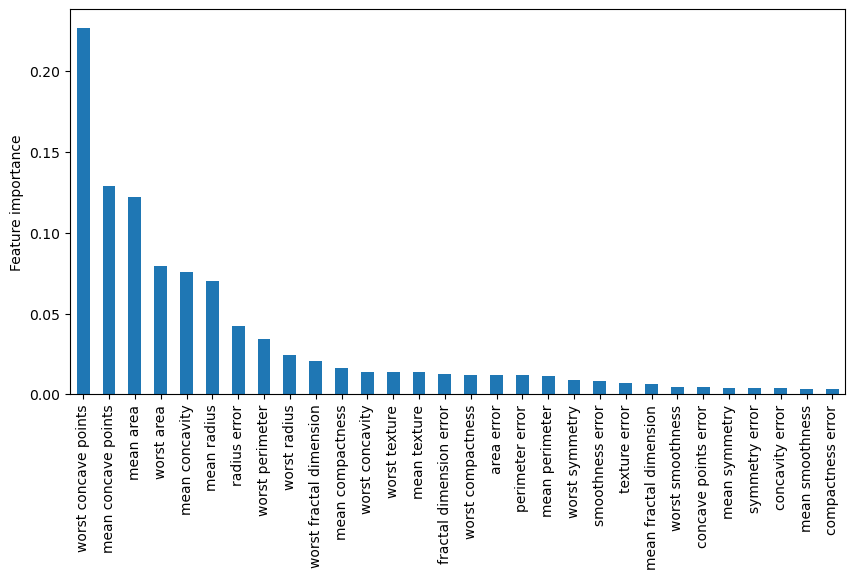

In [48]:
pd.Series(sel_.estimator_.feature_importances_.ravel(),
          index = X_train.columns).sort_values(ascending=False).plot.bar(figsize = (10,5))
plt.ylabel("Feature importance")
plt.show()

In [50]:
X_train_selecetd = sel_.transform(X_train)
X_test_selecetd = sel_.transform(X_test)
X_train_selecetd

array([[1.185e+01, 4.327e+02, 2.688e-02, ..., 8.435e+01, 5.178e+02,
        9.140e-02],
       [1.122e+01, 3.873e+02, 5.006e-03, ..., 7.691e+01, 4.361e+02,
        2.022e-02],
       [2.013e+01, 1.261e+03, 1.440e-01, ..., 1.550e+02, 1.731e+03,
        1.628e-01],
       ...,
       [9.436e+00, 2.786e+02, 2.710e-02, ..., 7.579e+01, 4.396e+02,
        5.052e-02],
       [9.720e+00, 2.881e+02, 0.000e+00, ..., 6.225e+01, 3.038e+02,
        0.000e+00],
       [1.151e+01, 4.035e+02, 1.112e-01, ..., 8.228e+01, 4.742e+02,
        9.653e-02]])

### 7.3 Recursive feature elemination by feature importance

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

In [52]:
brest_cancer = load_breast_cancer()
X = pd.DataFrame(brest_cancer.data, columns = brest_cancer.feature_names)
y = brest_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
sel_ = RFE(
    RandomForestClassifier(
        n_estimators=10, random_state=10
    ),
    n_features_to_select=8,
    step = 2
)

sel_.fit(X_train, y_train)
selected_feats = X_train.columns[(sel_.get_support())]
selected_feats

Index(['mean area', 'mean concave points', 'area error', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness',
       'worst concave points'],
      dtype='object')

In [54]:
X_train_selecetd = sel_.transform(X_train)
X_test_selecetd = sel_.transform(X_test)
X_train_selecetd

array([[4.327e+02, 2.280e-02, 1.388e+01, ..., 5.178e+02, 1.758e-01,
        9.140e-02],
       [3.873e+02, 7.583e-03, 1.962e+01, ..., 4.361e+02, 9.669e-02,
        2.022e-02],
       [1.261e+03, 9.791e-02, 9.904e+01, ..., 1.731e+03, 1.922e-01,
        1.628e-01],
       ...,
       [2.786e+02, 1.406e-02, 3.048e+01, ..., 4.396e+02, 1.049e-01,
        5.052e-02],
       [2.881e+02, 0.000e+00, 2.169e+01, ..., 3.038e+02, 2.729e-02,
        0.000e+00],
       [4.035e+02, 4.105e-02, 1.697e+01, ..., 4.742e+02, 2.517e-01,
        9.653e-02]])